# Erosion and Dilation
Erosion and Dilation are two fundamental morphological operations in image processing. They are primarily used to process binary images (images with pixels that are either black or white) but can also be extended to grayscale images. These operations are essential for tasks such as noise removal, shape analysis, and image enhancement.

**1. Understanding Morphological Operations**  
Morphological operations focus on the shape or structure of objects within an image. They rely on a predefined shape called a structuring element to probe and transform the input image.

**2. Structuring Element**  
A structuring element is a small binary matrix (e.g., 3x3, 5x5) that defines the neighborhood used to process each pixel in the image. Common shapes include:
- Square or Rectangle
- Disk or Circle
- Cross


**3. Erosion**  
Erosion shrinks the boundaries of the foreground (typically white) objects in an image. It removes pixels on object boundaries, effectively reducing the size of objects.

*How Erosion Works:*

1. Overlay the structuring element on each pixel of the image.
2. Check if the structuring element fits entirely within the foreground when centered on that pixel.
3. Set the output pixel to foreground (white) only if all pixels under the structuring element are foreground; otherwise, set it to background (black).

*Effects of Erosion:*
- Removes small objects or noise: Tiny white regions are eliminated.
- Separates connected objects: Thin bridges between objects can be broken.
- Shrinks larger objects: Reduces the size and smooths the boundaries.

**IMPLEMENTATION**

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [12]:
image = cv2.imread('./images/ero.png')

In [20]:
# Step 1: convert to gray
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [21]:
# Step 2: Apply binary thresholding
# This converts the grayscale image to binary (black and white)
# You can adjust the threshold value (127) as needed
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

In [22]:
# Step 3: Define the structuring element
# You can experiment with different shapes and sizes
# Common shapes: cv2.MORPH_RECT, cv2.MORPH_ELLIPSE, cv2.MORPH_CROSS
kernel_size = (5, 5)  # You can change the size as needed
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

In [28]:
num_iterations = 5
# Step 4: Apply Erosion Iteratively and Store Results
eroded_images = [binary.copy()]  # List to store original and eroded images

current_image = binary.copy()
for i in range(1, num_iterations + 1):
    eroded = cv2.erode(current_image, kernel, iterations=1)
    eroded_images.append(eroded)
    current_image = eroded  # Update for next iteration

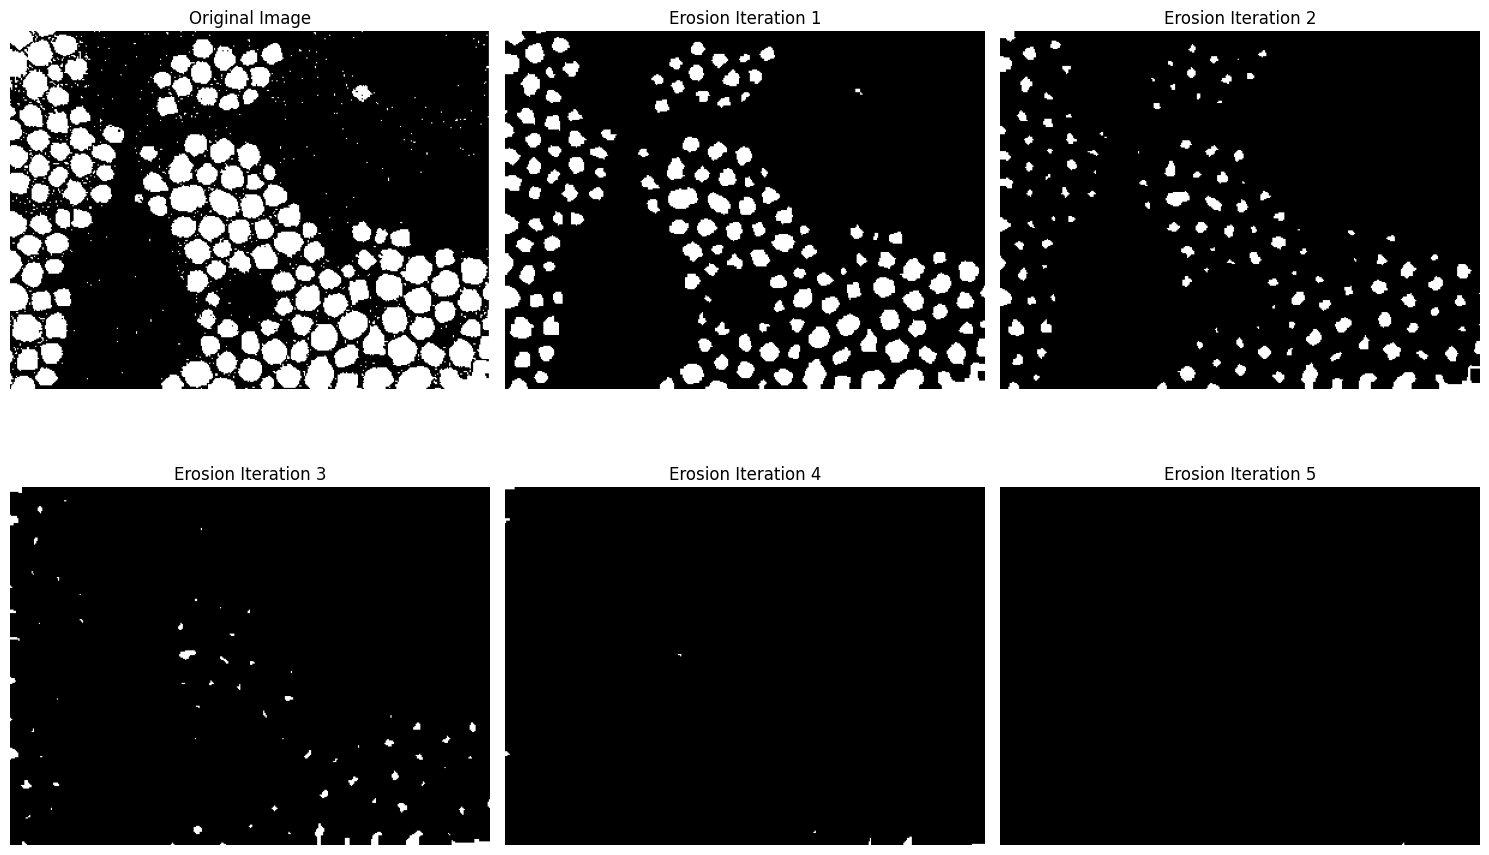

In [30]:
import math
# Step 5: Determine Grid Layout
# Decide on the number of columns and rows based on total images
total_images = num_iterations + 1  # Original + eroded iterations

# For better visualization, limit the number of columns
max_cols = 3  # Adjust based on preference
cols = min(total_images, max_cols)
rows = math.ceil(total_images / cols)

# Step 8: Create Subplots
plt.figure(figsize=(5 * cols, 5 * rows))  # Increase figsize based on grid

for idx, img in enumerate(eroded_images):
    plt.subplot(rows, cols, idx + 1)
    if idx == 0:
        plt.title('Original Image')
    else:
        plt.title(f'Erosion Iteration {idx}')
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Hide axis

plt.tight_layout()
plt.show()

**4. Dilation**  
Dilation does the opposite of erosion; it expands the boundaries of the foreground objects. It adds pixels to the edges of objects, potentially filling in small holes and connecting nearby objects.

*How Dilation Works:*  
1. Overlay the structuring element on each pixel of the image.
2. Set the output pixel to foreground (white) if any of the pixels under the structuring element are foreground; otherwise, set it to background (black).

*Effects of Dilation:*  
- Fills small holes and gaps within objects.
- Connects nearby objects by bridging small gaps.
- Expands the size of objects and smooths their boundaries.

**IMPLEMENTATION**

In [39]:
# Load the image in grayscale
image = cv2.imread('./images/ero.png', cv2.IMREAD_GRAYSCALE)

In [40]:
# Convert to binary image by thresholding (if not already binary)
# Adjust threshold value as needed
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

In [41]:
kernel_size = (5, 5)  # You can adjust the size
kernel_shape = cv2.MORPH_RECT  # Options: MORPH_RECT, MORPH_ELLIPSE, MORPH_CROSS

# Create the structuring element
kernel = cv2.getStructuringElement(kernel_shape, kernel_size)

In [42]:
num_iterations = 5  # Number of dilation iterations

# List to store original and dilated images
dilated_images = [binary.copy()]  # Original image at index 0

current_image = binary.copy()
for i in range(1, num_iterations + 1):
    # Apply dilation
    dilated = cv2.dilate(current_image, kernel, iterations=1)
    dilated_images.append(dilated)
    current_image = dilated  # Update for next iteration


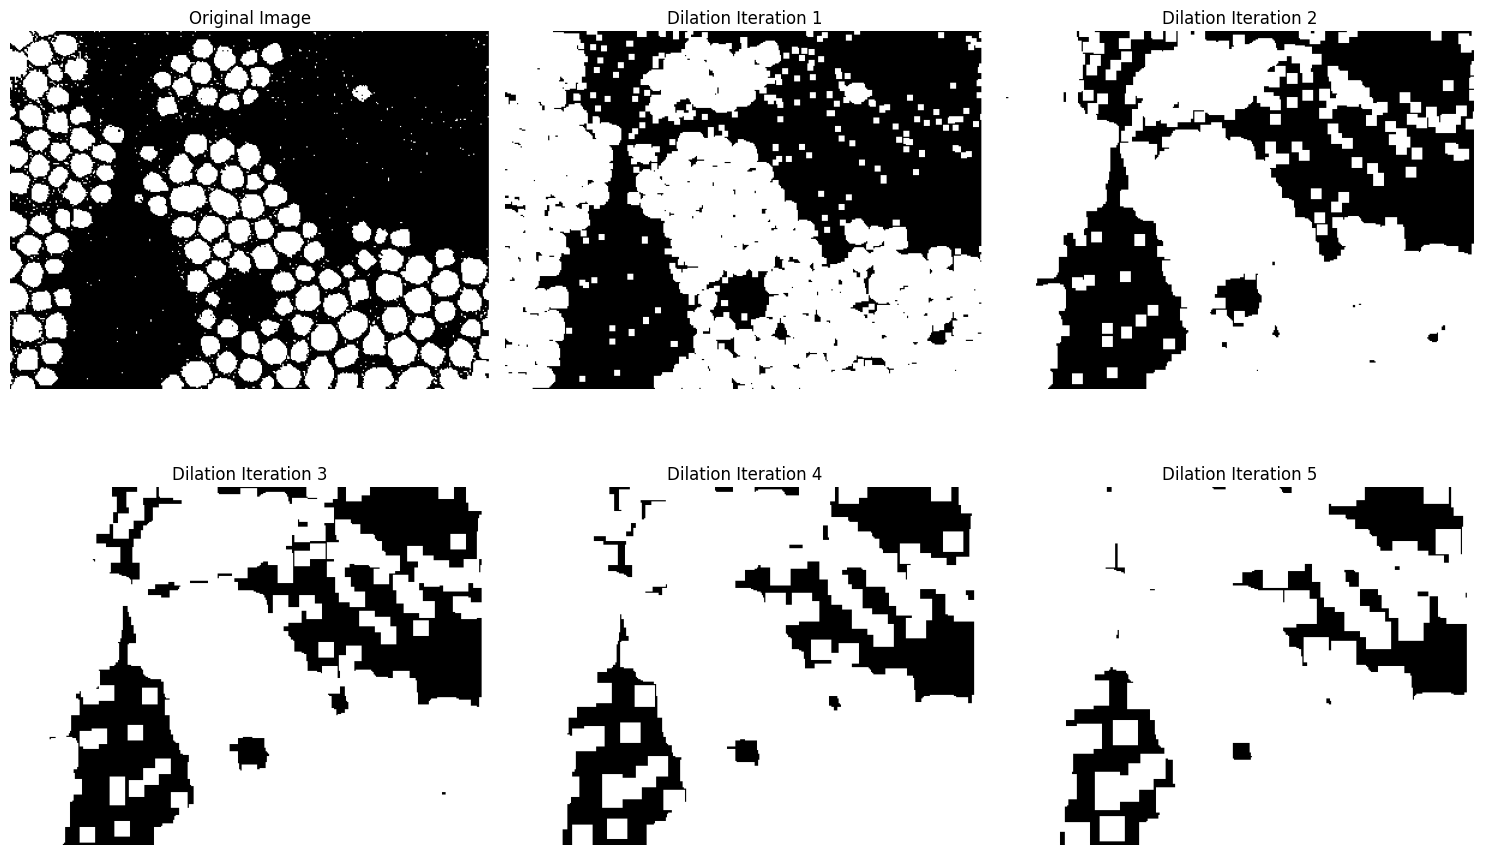

In [43]:
# Determine grid layout
total_images = num_iterations + 1  # Original + dilated iterations
max_cols = 3  # Maximum number of columns in the grid
cols = min(total_images, max_cols)
rows = math.ceil(total_images / cols)

# Create a new figure with adjusted size
plt.figure(figsize=(5 * cols, 5 * rows))  # 5 inches per column and row

for idx, img in enumerate(dilated_images):
    plt.subplot(rows, cols, idx + 1)
    if idx == 0:
        plt.title('Original Image')
    else:
        plt.title(f'Dilation Iteration {idx}')
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Hide axis for better visualization

plt.tight_layout()
plt.show()